## Introduction

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

A piece of text which is in any of South Africa's 11 Official languages will be identified as to which language the text is in. 

## 1. Importing Packages

In this section the libraries that will be used throughout the analysis and modelling are imported and discussed.

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Loading the Data

In this section data is loaded  from the train_set.csv file into a DataFrame. 

In [2]:
#load train data
pd.set_option('display.max_colwidth', None)
df= pd.read_csv('train_set.csv')

df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


## 3. Exploratory Data Analysis (EDA)


In [3]:
#explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [4]:
#check for missing values
df.isnull().sum()

lang_id    0
text       0
dtype: int64

In [5]:
#unique text
df.describe(include='object')

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu unelungelo lokudlulisela isililo sakho kusomkhandlu wezehlalakuhle ngokutlola incwadi uyithumele e-adresini elandelako kungakapheli amalanga amatjhumi alithoba ukusukela mhlazana uthola incwadi le
freq,3000,17


In [6]:
#see is classes are balanced
df["lang_id"].value_counts()


xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

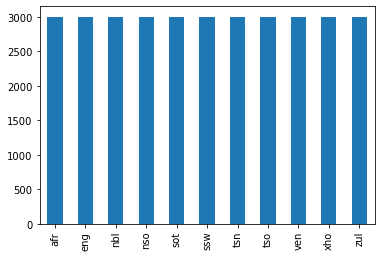

In [7]:
#check if data is balanced
df['lang_id'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

The classes are distrubuted equally

## 4. Data Engineering

In this section the dataset is cleaned and the features, are engineered as identified in the EDA phase. 

##### Classes (y)

The classes are encoded so that they are numerical and can be used in the model

In [8]:
#separate X and y
X_text = df["text"]
y = df["lang_id"]

In [9]:
#Enconding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
#Mapp encoded classes to class
def get_integer_mapping(le):
    '''
    Return a dict mapping labels to their integer values
    from an SKlearn LabelEncoder
    le = a fitted SKlearn LabelEncoder
    '''
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})

    return res

integerMapping = get_integer_mapping(le)

for name in df['lang_id'].unique():
    print(name,integerMapping[name])

xho 9
eng 1
nso 3
ven 8
tsn 6
nbl 2
zul 10
ssw 5
tso 7
sot 4
afr 0


##### Unseen test data

The unseen test dataset is cleaned and preprocessed

In [11]:
#load unseen data
pd.set_option('display.max_colwidth', None)
df_test= pd.read_csv('test_set.csv')

df_test.head(2)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlelela kgato eo."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho.


In [12]:
# Remove special characters using NeatText
import neattext.functions as nt
df_test['text'] = df_test['text'].apply(nt.remove_special_characters)

# Remove multiple whitespace between words
df_test['text'] = df_test['text'].apply(nt.remove_multiple_spaces)

#making text lower case
df_test['text'] = df_test['text'].str.lower()
df_test.head(2)

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelela kgato eo
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho


In [13]:
#create x vector
from sklearn.feature_extraction.text import CountVectorizer
cv_test = CountVectorizer(dtype=np.int32,ngram_range=(3,3) ,analyzer="char")
x_test = cv_test.fit_transform(df_test["text"]).toarray()

In [14]:
#dataframe of x
x_feat=pd.DataFrame(x_test, columns = cv_test.get_feature_names())
x_feat.head(2)

C:\Users\u1121\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,00,01,02,03,05,07,08,1,10,...,zur,zus,zuv,zux,zuz,zwa,zwe,zwi,zwo,zze
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#get feature names from vector
x_names=cv_test.get_feature_names()

C:\Users\u1121\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Feature extraction from train data


Use count vectorizer to make a numercal vector of the feature words so that they can be modelled

In [16]:
# Remove special characters using NeatText
import neattext.functions as nt
df['text'] = df['text'].apply(nt.remove_special_characters)

# Remove multiple whitespace between words
df['text'] = df['text'].apply(nt.remove_multiple_spaces)

In [17]:
#create X vector
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(dtype=np.int32,ngram_range=(3,3) ,analyzer="char")
X = cv.fit_transform(X_text).toarray()

In [18]:
#dataframe of X
X_feat=pd.DataFrame(X, columns = cv.get_feature_names())
X_feat.head(2)

,-,--,-a,-b,-c,-d,-e,-f,-g,-h,...,‚â©,€ o,€˜n,™ a,™ f,™ k,● a,● b,● h,● w
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Match features

Match B0,B1,B2 ect from train and test

In [19]:
#new_X_feat=X_feat[x_names]

In [20]:
#text that is  not common in both text
no_match=[' 0 ', ' 00', ' 01', ' 02', ' 03', ' 05', ' 07', ' 08', ' 1 ', ' 10', ' 11', ' 12', ' 13', ' 14', ' 15', ' 16', ' 17', ' 18', ' 19', ' 1a', ' 1b', ' 1l', ' 1t', ' 2 ', ' 20', ' 21', ' 22', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28', ' 29', ' 2a', ' 2b', ' 2c', ' 2k', ' 3 ', ' 30', ' 31', ' 32', ' 33', ' 34', ' 35', ' 36', ' 37', ' 38', ' 39', ' 3a', ' 3b', ' 3k', ' 3t', ' 4 ', ' 40', ' 41', ' 42', ' 43', ' 44', ' 45', ' 46', ' 47', ' 48', ' 49', ' 4b', ' 4t', ' 5 ', ' 50', ' 51', ' 52', ' 53', ' 54', ' 55', ' 56', ' 57', ' 58', ' 59', ' 5a', ' 5b', ' 5c', ' 5t', ' 6 ', ' 60', ' 61', ' 62', ' 63', ' 64', ' 65', ' 66', ' 67', ' 68', ' 69', ' 6a', ' 7 ', ' 70', ' 71', ' 72', ' 73', ' 74', ' 75', ' 76', ' 77', ' 78', ' 7a', ' 7k', ' 8 ', ' 80', ' 81', ' 82', ' 85', ' 86', ' 87', ' 88', ' 89', ' 8b', ' 8c', ' 9 ', ' 90', ' 91', ' 92', ' 93', ' 94', ' 95', ' 96', ' 97', ' 99', ' a4', ' fv', ' i0', ' i5', ' k2', ' k3', ' ld', ' lh', ' m2', ' p1', ' q1', ' q2', ' r1', ' r2', ' r3', ' r4', ' r5', ' r6', ' r7', ' r9', ' s1', ' s2', ' s3', ' s8', ' tg', ' u0', ' u2', ' vn', ' x7', ' xf', ' z5', '0 0', '0 1', '0 2', '0 3', '0 4', '0 5', '0 6', '0 7', '0 a', '0 b', '0 c', '0 d', '0 e', '0 g', '0 h', '0 i', '0 j', '0 k', '0 l', '0 m', '0 n', '0 o', '0 p', '0 r', '0 s', '0 t', '0 u', '0 v', '0 w', '0 x', '0 y', '0 z', '00 ', '000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '00g', '00k', '00m', '01 ', '010', '011', '012', '013', '014', '015', '018', '01a', '02 ', '020', '021', '022', '024', '025', '03 ', '030', '031', '032', '034', '039', '03e', '03v', '04 ', '040', '041', '042', '043', '044', '045', '04n', '04v', '05 ', '050', '051', '054', '055', '056', '05a', '05t', '06 ', '060', '061', '063', '064', '065', '067', '068', '06c', '06d', '06t', '07 ', '070', '072', '075', '079', '07d', '07p', '07t', '08 ', '080', '081', '082', '083', '084', '086', '089', '08c', '08h', '08n', '08t', '09 ', '090', '091', '092', '093', '094', '09c', '09p', '0a ', '0a2', '0au', '0b ', '0d ', '0de', '0du', '0en', '0fe', '0fi', '0g ', '0km', '0ku', '0kw', '0m ', '0mm', '0nd', '0th', '0ti', '0xh', '0ye', '0zu', '1 0', '1 1', '1 2', '1 3', '1 4', '1 5', '1 6', '1 8', '1 a', '1 b', '1 c', '1 d', '1 e', '1 f', '1 g', '1 h', '1 i', '1 j', '1 k', '1 l', '1 m', '1 n', '1 o', '1 p', '1 q', '1 r', '1 s', '1 t', '1 u', '1 v', '1 w', '1 x', '1 y', '10 ', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '10a', '10d', '10e', '10f', '10k', '10m', '10n', '10t', '10x', '10y', '10z', '11 ', '110', '111', '112', '113', '114', '115', '116', '117', '119', '11m', '11v', '12 ', '120', '121', '122', '123', '124', '125', '128', '12h', '12v', '12w', '13 ', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '13v', '13x', '14 ', '140', '141', '142', '143', '144', '145', '146', '147', '149', '14d', '14t', '15 ', '150', '151', '152', '153', '154', '156', '159', '16 ', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '16a', '16b', '16c', '16t', '17 ', '170', '172', '174', '175', '179', '17h', '18 ', '180', '181', '182', '184', '187', '189', '19 ', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '1a ', '1a2', '1ad', '1b ', '1en', '1f ', '1h ', '1le',
          '1m ', '1ma', '1si', '1tx', '1va', '1vm', '1vq', '2 0', '2 1', '2 2', '2 3', '2 4', '2 5', '2 7', '2 8', '2 a', '2 b', '2 c', '2 e', '2 g', '2 h', '2 i', '2 k', '2 l', '2 m', '2 n', '2 o', '2 p', '2 s', '2 t', '2 u', '2 v', '2 w', '2 x', '2 y', '2 z', '20 ', '200', '201', '202', '203', '205', '206', '207', '208', '209', '20a', '20b', '21 ', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '21a', '21v', '22 ', '220', '221', '222', '224', '225', '226', '227', '228', '229', '22e', '22v', '23 ', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '23v', '24 ', '241', '242', '243', '244', '245', '246', '24a', '25 ', '250', '251', '252', '259', '25a', '25e', '26 ', '260', '261', '262', '27 ', '272', '279', '27e', '28 ', '280', '281', '285', '289', '29 ', '291', '294', '295', '29a', '2a ', '2b ', '2bi', '2c ', '2en', '2h0', '2kb', '2se', '2tk', '2vm', '2vq', '2w ', '3 0', '3 1', '3 2', '3 4', '3 5', '3 6', '3 8', '3 a', '3 b', '3 c', '3 d', '3 e', '3 f', '3 g', '3 h', '3 i', '3 j', '3 k', '3 l', '3 m', '3 n', '3 o', '3 p', '3 r', '3 s', '3 t', '3 u', '3 v', '3 w', '3 x', '3 y', '3 z', '30 ', '300', '302', '303', '304', '306', '307', '309', '30a', '30t', '31 ', '310', '311', '312', '313', '315', '317', '318', '319', '32 ', '320', '321', '323', '324', '325', '33 ', '331', '333', '334', '339', '34 ', '340', '344', '348', '349', '34a', '35 ', '350', '351', '354', '36 ', '361', '362', '364', '365', '367', '36a', '37 ', '370', '372', '374', '37a', '38 ', '380', '381', '382', '384', '39 ', '390', '392', '3a ', '3a2', '3b ', '3en', '3kb', '3tx', '3vm', '3vq', '3xh', '4 0', '4 1', '4 2', '4 4', '4 5', '4 a', '4 b', '4 d', '4 e', '4 f', '4 g', '4 h', '4 i', '4 k', '4 l', '4 m', '4 n', '4 o', '4 p', '4 r', '4 s', '4 t', '4 u', '4 v', '4 w', '4 x', '4 y', '40 ', '400', '403', '40e', '40k', '41 ', '411', '412', '413', '414', '415', '419', '42 ', '420', '421', '422', '424', '426', '428', '43 ', '430', '432', '436', '44 ', '441', '442', '443', '444', '446', '44e', '45 ', '450', '451', '452', '455', '45e', '46 ', '461', '467', '47 ', '471', '473', '48 ', '480', '489', '49 ', '492', '493', '495', '49t', '4a2', '4af', '4bj', '4da', '4en', '4nd', '4th', '4tk', '4tx', '4ve', '5 0', '5 1', '5 2', '5 6', '5 a', '5 b', '5 c', '5 d', '5 e', '5 f', '5 g', '5 h', '5 i', '5 j', '5 k', '5 l', '5 m', '5 n', '5 o', '5 p', '5 r', '5 s', '5 t', '5 u', '5 v', '5 w', '5 x', '5 y', '5 z', '50 ', '500', '503', '505', '50k', '50m', '50t', '51 ', '510', '514', '515', '517', '519', '51e', '52 ', '521', '522', '525', '527', '529', '53 ', '530', '533', '54 ', '541', '545', '546', '549', '55 ', '550', '553', '559', '56 ', '560', '566', '57 ', '570', '573', '574', '576', '577', '58 ', '581', '583', '588', '59 ', '591', '594', '595', '598', '59e', '5a ', '5af', '5av', '5b ', '5cm', '5e ', '5en', '5tx', '6 0', '6 1', '6 2', '6 3', '6 5', '6 6', '6 9', '6 a', '6 b', '6 c', '6 d', '6 e', '6 f', '6 g', '6 h', '6 i', '6 k', '6 l', '6 m', '6 n', '6 o', '6 p', '6 r', '6 s', '6 t', '6 u', '6 v', '6 w', '6 x', '6 y', '6 z', '60 ', '600', '605', '606', '608', '609', '61 ', '610', '614', '619', '61a', '61e', '61s', '62 ', '620', '622', '62b', '62t', '63 ', '630', '634', '635', '638', '63b', '63e', '64 ',
          '640', '641', '64e', '65 ', '650', '65e', '66 ', '663', '67 ', '671', '674', '67e', '68 ', '681', '683', '685', '687', '69 ', '690', '694', '6a ', '6a2', '6b ', '6c ', '6ca', '6de', '6th', '6tx', '7 0', '7 1', '7 2', '7 a', '7 b', '7 d', '7 e', '7 f', '7 g', '7 h', '7 k', '7 l', '7 m', '7 n', '7 o', '7 p', '7 r', '7 s', '7 t', '7 u', '7 v', '7 w', '7 x', '7 y', '7 z', '70 ', '700', '708', '70a', '71 ', '710', '712', '717', '71a', '71e', '72 ', '720', '721', '722', '723', '73 ', '730', '731', '734', '735', '736', '737', '73a', '74 ', '747', '749', '74t', '75 ', '750', '759', '76 ', '760', '761', '762', '763', '764', '766', '77 ', '770', '771', '773', '776', '778', '78 ', '782', '79 ', '794', '79e', '7a ', '7a2', '7di', '7en', '7h0', '7kb', '7pu', '7tx', '8 1', '8 a', '8 b', '8 d', '8 e', '8 f', '8 g', '8 h', '8 j', '8 k', '8 l', '8 m', '8 n', '8 o', '8 p', '8 s', '8 t', '8 u', '8 v', '8 w', '8 x', '8 y', '8 z', '80 ', '800', '801', '802', '808', '809', '80e', '81 ', '810', '811', '812', '815', '819', '81e', '81f', '82 ', '820', '822', '828', '829', '83 ', '837', '84 ', '844', '85 ', '850', '854', '856', '857', '859', '86 ', '860', '861', '866', '87 ', '871', '872', '877', '879', '88 ', '88t', '89 ', '89d', '8cm', '8co', '8h0', '8ng', '8ti', '8tx', '9 1', '9 3', '9 4', '9 a', '9 b', '9 d', '9 e', '9 f', '9 g', '9 h', '9 i', '9 j', '9 k', '9 l', '9 m', '9 n', '9 o', '9 p', '9 r', '9 s', '9 t', '9 u', '9 v', '9 w', '9 x', '9 y', '9 z', '90 ', '900', '902', '909', '91 ', '910', '911', '912', '913', '915', '919', '91a', '92 ', '920', '921', '922', '923', '925', '927', '928', '929', '93 ', '930', '931', '932', '933', '934', '939', '94 ', '940', '941', '942', '944', '945', '946', '947', '948', '949', '95 ', '950', '951', '954', '955', '956', '957', '958', '959', '96 ', '960', '961', '962', '964', '965', '967', '97 ', '973', '975', '976', '977', '978', '979', '98 ', '980', '981', '982', '983', '984', '985', '986', '987', '988', '989', '99 ', '990', '992', '993', '994', '995', '996', '997', '998', '999', '9a ', '9co', '9d ', '9en', '9po', '9ti', 'a 0', 'a 1', 'a 2', 'a 3', 'a 4', 'a 5', 'a 6', 'a 7', 'a 8', 'a 9', 'a1 ', 'a10', 'a11', 'a12', 'a13', 'a16', 'a17', 'a19', 'a1h', 'a2 ', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a27', 'a28', 'a29', 'a3 ', 'a30', 'a32', 'a34', 'a35', 'a36', 'a39', 'a4 ', 'a40', 'a41', 'a45', 'a48', 'a50', 'a51', 'a52', 'a55', 'a56', 'a59', 'a6 ', 'a60', 'a63', 'a67', 'a80', 'a85', 'a90', 'aej', 'aiu', 'alx', 'an2', 'ar0', 'ar1', 'ar3', 'ar5', 'atx', 'avw', 'aw1', 'awq', 'ayg', 'b 0', 'b20', 'ba2', 'ba6', 'bhp', 'bo1', 'bsm', 'bzu', 'c 2', 'c03', 'ccc', 'cd4', 'chs', 'cjr', 'csg', 'ctx', 'ctz', 'cyp', 'cys', 'd 1', 'd 2', 'd 3', 'd 5', 'd 6', 'd 9', 'd4 ', 'd46', 'd58', 'd59', 'd95', 'd96', 'da2', 'dfl', 'dfs', 'dkr', 'do3', 'drt', 'dtn', 'dtx', 'du1', 'e 0', 'e 1', 'e 2', 'e 3', 'e 4', 'e 5', 'e 6', 'e 7', 'e 8', 'e 9', 'e15', 'e16', 'e19', 'e20', 'e24', 'e26', 'e27', 'e30', 'e31', 'e35', 'e36', 'e40', 'e48', 'e6 ', 'e9 ', 'e91', 'eb2', 'ebm', 'ec0', 'ee2', 'efg', 'el1', 'em2', 'en2', 'eoc', 'er1', 'er2', 'er7', 'es2', 'etx', 'ewd', 'exg', 'ez ', 'ez5', 'f 1', 'f 2', 'f 3', 'f 6', 'f 7', 'f20', 'ffh', 'fgh', 'fn ', 'fn0', 'fn1', 'fn2', 'fn3', 'fn4', 'fn5', 'fn7', 
          'fn8', 'fnc', 'fng', 'fnt', 'foh', 'fr2', 'frs', 'fsc', 'ftf', 'ftp', 'ftx', 'fu5', 'fvr', 'g 1', 'g 2', 'g 3', 'g 4', 'g 5', 'g 6', 'g 7', 'g 8', 'g 9', 'g1a', 'ga2', 'glw', 'go2', 'gu1', 'gu4', 'gu8', 'gya', 'h 1', 'h 2', 'h 3', 'h 6', 'h00', 'hdy', 'hi0', 'hj ','ho1', 'hrp', 'htx', 'hu2', 'hxw', 'hyr', 'i 0', 'i 1', 'i 2', 'i 3', 'i 4', 'i 5', 'i 6', 'i 7', 'i01', 'i08', 'i10', 'i11', 'i12', 'i14', 'i18', 'i1m', 'i2 ', 'i20', 'i3 ', 'i37', 'i4 ', 'i42', 'i43', 'i44', 'i5 ', 'i50', 'i54', 'i6 ', 'i61', 'i8 ', 'icv', 'id4', 'id5', 'id9', 'iex', 'ihy', 'ijh', 'imy', 'ir1', 'itx', 'ixr', 'j 1', 'jh ', 'jre', 'k 1', 'k 2', 'k 3', 'k 4', 'k 5', 'k 6', 'k 7', 'k 8', 'k 9', 'k1 ', 'k2 ', 'k20', 'k3 ', 'ka1', 'ka2', 'ka3', 'ka4', 'kb ', 'kdf', 'ke2', 'ke3', 'ke4', 'ki4', 'kl1', 'kl2', 'kl3', 'kl4', 'kl7', 'kl8', 'ko1', 'kpy', 'ku0', 'ku1', 'ku3', 'kws', 'l 0', 'l 1', 'l 2', 'l 3', 'l 4', 'l 5', 'l 6', 'l 7', 'l 8', 'l1 ', 'l2 ', 'l3 ', 'l4 ', 'l7 ', 'l8 ', 'la1', 'ldd', 'ldf', 'le1', 'le3', 'le6', 'le9', 'lfk', 'lfm', 'li1', 'llf', 'lo1', 'lo2', 'lo4', 'lpy', 'lsd', 'lsu', 'lxh', 'm 1', 'm 7', 'm2 ', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6', 'ma8', 'ma9', 'mbz', 'mf2', 'mhx', 'mlh', 'mmt', 'mmx', 'ms2', 'n 0', 'n 1', 'n 2', 'n 3', 'n 4', 'n 5', 'n 6', 'n 8', 'n 9', 'n08', 'n09', 'n11', 'n20', 'n22', 'n27', 'n31', 'n38', 'n39', 'n43', 'n49', 'n51', 'n52', 'n7 ', 'n71', 'n73', 'n76', 'n87', 'na1', 'na2', 'na3', 'na5', 'na6', 'ncj', 'ndn', 'ne1', 'ne2', 'ne3', 'ng1', 'ng3', 'nhh', 'nhr', 'ni6', 'nl ', 'nnq', 'no5', 'npy', 'nr1', 'nsz', 'nt2', 'ntx', 'nuy', 'o 0', 'o 1', 'o 2', 'o 3', 'o 4', 'o 5', 'o 6', 'o 7', 'o 8', 'o 9', 'o1 ', 'o10', 'o19', 'o1t', 'o2 ', 'o20', 'o21', 'o23', 'o38', 'o46', 'o5 ', 'ocy', 'oeh', 'on2', 'on7', 'otx', 'ovw', 'ovy', 'ovz', 'p 1', 'p 2', 'p 3', 'p 4', 'p 6', 'p12', 'p20', 'phj', 'pms', 'ppz', 'pvu', 'pww', 'pzu', 'q1 ', 'q2s', 'qey', 'qf2', 'qfl', 'qp2', 'qs2', 'r 1', 'r 2', 'r 3', 'r 4', 'r 7', 'r 8', 'r09', 'r1 ', 'r10', 'r11', 'r12', 'r13', 'r14', 'r15', 'r16', 'r17', 'r18', 'r19', 'r1b', 'r1v', 'r2 ', 'r20', 'r23', 'r25', 'r26', 'r27', 'r2e', 'r3 ', 'r37', 'r38', 'r4 ', 'r40', 'r42', 'r45', 'r5 ', 'r53', 'r54', 'r55', 'r6 ', 'r60', 'r65', 'r69', 'r7 ', 'r70', 'r72', 'r73', 'r90', 'r93', 'r98', 're9', 'rfg', 'rnd', 'rpy', 'rs2', 'rs3', 'rs4', 'rs5', 'rtc', 'rtv', 's 0', 's 1', 's 2', 's 3', 's 5', 's 6', 's 7', 's 9', 's1 ', 's12', 's16', 's17', 's20', 's21', 's2e', 's35', 's36', 's3e', 's4e', 's5e', 's8 ', 'sa3', 'sa5', 'scm', 'se2', 'se4', 'sg ', 'sgu', 'si2', 'si3', 'si4', 'si5', 'si8', 'skp', 'so2', 'spg', 'st2', 'stk', 'szu', 't 0', 't 1', 't 2', 't 3', 't 4', 't 5', 't 6', 't 7', 't 8', 't20', 'ta2', 'ta4', 'tci', 'tfc', 'tfn', 'tgw', 'ti4', 'tmf', 'tnt', 'to1', 'tu5', 'txt', 'tym', 'tzs', 'u 0', 'u 1', 'u 2', 'u 3', 'u 4', 'u 5', 'u 6', 'u 7', 'u 9', 'u00', 'u08', 'u1 ', 'u14', 'u15', 'u18', 'u20', 'u22', 'u33', 'u45', 'u47', 'u5 ', 'u50', 'u57', 'u58', 'u80', 'ugl', 'ukd', 'unv', 'uok', 'uos', 'upk', 'ur1', 'utx', 'uwc', 'uww', 'v 1', 'v q', 'vmf', 'vn ', 'vo2', 'vov', 'vqf', 'vqp', 'vqs', 'vr1', 'vza', 'w 2', 'w10', 'w12', 'w17', 'wa1', 'wa2', 'wa4', 'wa6', 'wbv', 'we1', 'we2', 'we3', 'whr', 'wi3', 'wi5', 'wla', 'wqf', 'wsi', 'wsk', 'wu4', 'wu5', 'ww1',
          'wwg', 'wws', 'wyg', 'wyi', 'x 8', 'x78', 'xfu', 'xgr', 'xht', 'xra', 'xtb', 'xtf', 'y 0', 'y 1', 'y 2', 'y 3', 'y 6', 'y 8', 'y 9', 'y z', 'ya2', 'yeu', 'yi1', 'yi5', 'ymu', 'yoa', 'ypa', 'ysc', 'z58', 'za1', 'zi2', 'zi4', 'zi5', 'zi6', 'zs ', 'zsf', 'zu2', 'zu5']

In [21]:
#drop no_match
x_feat.drop(no_match, axis = 1, inplace=True)
x_feat.head()

,a,aa,ab,ac,ad,af,ag,ah,ai,aj,...,zur,zus,zuv,zux,zuz,zwa,zwe,zwi,zwo,zze
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#length of final list of feature
x_names2=x_feat.columns
len(x_names2)

6498

In [23]:
#final list of fitures
new_X_feat=X_feat[x_names2]
new_X_feat.head()

,a,aa,ab,ac,ad,af,ag,ah,ai,aj,...,zur,zus,zuv,zux,zuz,zwa,zwe,zwi,zwo,zze
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Select best performing features

Use Random Forest Importance to get optimal features

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(new_X_feat, y)

#feature importance
importances=tree.feature_importances_

In [25]:
#create dataframe with sorted feature importance
final_df=pd.DataFrame({'features':pd.DataFrame(new_X_feat).columns,"Importances":importances})
final_df.set_index("Importances")
final_df=final_df.sort_values('Importances')
print(final_df.to_string())

     features  Importances
0          a      0.000000
4266      ood     0.000000
4264      onz     0.000000
4263      ony     0.000000
4262      onx     0.000000
4261      onw     0.000000
4260      onv     0.000000
4259      onu     0.000000
4258      ont     0.000000
4257      ons     0.000000
4267      oof     0.000000
4256      onr     0.000000
4254      onp     0.000000
4253      ono     0.000000
4252      onn     0.000000
4251      onm     0.000000
4250      onl     0.000000
4248      onj     0.000000
4246      onh     0.000000
4244      onf     0.000000
4241      onc     0.000000
4255      onq     0.000000
4240      onb     0.000000
4268      oog     0.000000
4270      ooi     0.000000
4291      opp     0.000000
4290      opo     0.000000
4289      opm     0.000000
4288      opl     0.000000
4287      opi     0.000000
4286      oph     0.000000
4285      opg     0.000000
4284      opf     0.000000
4283      ope     0.000000
4269      ooh     0.000000
4282      opd     0.000000
4

In [26]:
final_df2=final_df[(final_df['Importances'] > 0)]
list(final_df2['features'].values)

['tlw',
 'gis',
 'bas',
 'e j',
 ' es',
 'wos',
 'hir',
 'ngi',
 ' no',
 'suc',
 'isw',
 'i u',
 'but',
 ' ko',
 'eli',
 'mbo',
 'tek',
 'our',
 'xip',
 'ori',
 'as ',
 'o l',
 ' im',
 'wi ',
 'ive',
 ' am',
 'hin',
 'edz',
 'nez',
 ' ub',
 'r g',
 'nci',
 'bam',
 'ugc',
 'ant',
 'ele',
 'obu',
 'qen',
 'b u',
 'u v',
 'y p',
 'ee ',
 'zit',
 'rim',
 'spo',
 'azo',
 'u s',
 'gra',
 'hen',
 ' wo',
 'van',
 'bul',
 'u e',
 'osa',
 'lem',
 'egw',
 'umz',
 'use',
 'nel',
 'm n',
 'ina',
 'aba',
 'bap',
 'r i',
 'umt',
 'wad',
 'tyh',
 'lik',
 'imi',
 'eba',
 'siz',
 'a a',
 'mbe',
 'zal',
 'nal',
 'lom',
 ' de',
 'kal',
 'nan',
 'nda',
 'otf',
 ' yu',
 'tla',
 'ema',
 'ier',
 'uno',
 'aca',
 ' nt',
 'le ',
 'zon',
 'gaz',
 'asi',
 'e e',
 'wup',
 'omt',
 'hag',
 ' em',
 'hup',
 'mel',
 'caz',
 'yan',
 'o u',
 ' ti',
 'ngw',
 'men',
 'oni',
 'nzi',
 'ane',
 'cs ',
 'usu',
 'mit',
 'khw',
 'uph',
 'mpu',
 'ank',
 ' za',
 'amo',
 'kot',
 ' ke',
 'o m',
 'exe',
 'uki',
 'dab',
 'gan',
 'unc',


In [27]:
#new train dataframe with best features
X_dt=new_X_feat[list(final_df2['features'].values)]

In [28]:
#new test dataframe with best features
x_dt=X_feat[list(final_df2['features'].values)]

## 5. Modelling


In [29]:
#import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import cross_val_score

In [30]:
#split dataset to for training and setting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X_feat, y, 
                                                    test_size=0.25,
                                                    random_state = 0)
print("shape of x_train set :", X_train.shape)
print("shape of y_train set :",y_train.shape)
print("shape of x_test set :",X_test.shape)
print("shape of y_test set :",y_test.shape)

shape of x_train set : (24750, 6498)
shape of y_train set : (24750,)
shape of x_test set : (8250, 6498)
shape of y_test set : (8250,)


In [31]:
#splitting trimmed features

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_dt, y, 
 #                                                   test_size=0.25,
  #                                                  random_state = 0)
#print("shape of x_train set  :", X_train.shape)
#print("shape of y_train set :",y_train.shape)
#print("shape of x_test set :",X_test.shape)
#print("shape of y_test set :",y_test.shape)

## Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X_feat, y, 
                                                    test_size=0.25,
                                                    random_state =42)

# import logistic regression module
from sklearn.linear_model import LogisticRegression

# create model object
lr = LogisticRegression(multi_class='ovr',max_iter=200)

# train model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr')

#### Checking outcomes on the test set

In [33]:
#Generate predictions
y_pred_lr = lr.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       762
           2       1.00      1.00      1.00       734
           3       1.00      1.00      1.00       782
           4       1.00      1.00      1.00       759
           5       1.00      1.00      1.00       732
           6       1.00      1.00      1.00       746
           7       1.00      1.00      1.00       700
           8       1.00      1.00      1.00       785
           9       1.00      1.00      1.00       761
          10       0.99      0.99      0.99       735

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250



##### Logistic with trimmed features

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dt, y, 
                                                   test_size=0.25,
                                                  random_state = 0)

# import logistic regression module
from sklearn.linear_model import LogisticRegression

# create model object
lr_trim = LogisticRegression(multi_class='ovr',max_iter=200)

# train model
lr_trim.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr')

In [35]:
#Generate predictions
y_pred_lr_trim = lr_trim.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr_trim))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       758
           1       1.00      1.00      1.00       727
           2       0.99      0.99      0.99       773
           3       1.00      1.00      1.00       714
           4       1.00      1.00      1.00       750
           5       1.00      1.00      1.00       785
           6       1.00      1.00      1.00       710
           7       1.00      1.00      1.00       743
           8       1.00      1.00      1.00       743
           9       0.99      0.99      0.99       773
          10       0.98      0.99      0.98       774

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250



##### Predictions on unseen test set

In [36]:
preds_lr=lr.predict(x_feat)

In [37]:
daf=pd.DataFrame(preds_lr,columns=['index'])
daf.head(2)

,index
0,3
1,2


In [38]:
daf['lang_id'] = ['afri' if x==0 else 'eng' if x==1 else 'nbl' if x==2 else 'nso' if x==3 else 'sot' if x==4 else
                 'ssw' if x==5 else 'tsn' if x==6 else 'tso' if x==7 else 'ven' if x==8 else 
                  'xho' if x==9 else"zul" for x in daf['index']]


daf.head(3)

,index,lang_id
0,3,nso
1,2,nbl
2,8,ven


In [39]:
daf1=daf.drop(["index"], axis=1)

output=pd.DataFrame({'index':df_test['index']})
submission=output.join(daf1)
#submission.to_csv('3submission_lr.csv',index=False)

submission.head(2)

,index,lang_id
0,1,nso
1,2,nbl


## Naive Bayes

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X_feat, y, 
                                                    test_size=0.25,
                                                    random_state =42)

# import naive bayes regression module
from sklearn.naive_bayes import MultinomialNB

# create model instance
model = MultinomialNB()

# train model
model.fit(X_train, y_train)

MultinomialNB()

In [41]:
#Generate predictions
y_pred_nb= model.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       762
           2       1.00      1.00      1.00       734
           3       1.00      0.99      1.00       782
           4       1.00      1.00      1.00       759
           5       1.00      1.00      1.00       732
           6       0.99      1.00      1.00       746
           7       1.00      1.00      1.00       700
           8       1.00      1.00      1.00       785
           9       1.00      0.99      0.99       761
          10       0.99      1.00      1.00       735

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250



In [42]:
#Generate predictions
y_pred_nb= model.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       762
           2       1.00      1.00      1.00       734
           3       1.00      0.99      1.00       782
           4       1.00      1.00      1.00       759
           5       1.00      1.00      1.00       732
           6       0.99      1.00      1.00       746
           7       1.00      1.00      1.00       700
           8       1.00      1.00      1.00       785
           9       1.00      0.99      0.99       761
          10       0.99      1.00      1.00       735

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250



####  MultinomialNB gridsearch Tuning

In [43]:
#from sklearn.model_selection import GridSearchCV
#para_nb = {  'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  }  
#grid_search= GridSearchCV(model, para_nb)
#grid_search.fit(X_train,y_train)

#grid_search.best_params_

##### Tuned model

In [44]:
# import naive bayes regression module
from sklearn.naive_bayes import MultinomialNB

# create model instance
model_gs = MultinomialNB(alpha=0.1)

# train model
model_gs.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [45]:
#Generate predictions
y_pred_nb_gs= model_gs.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb_gs))

import warnings
warnings.filterwarnings('ignore')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       762
           2       1.00      1.00      1.00       734
           3       1.00      1.00      1.00       782
           4       1.00      1.00      1.00       759
           5       1.00      1.00      1.00       732
           6       1.00      1.00      1.00       746
           7       1.00      1.00      1.00       700
           8       1.00      1.00      1.00       785
           9       1.00      0.99      0.99       761
          10       0.99      1.00      0.99       735

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250



##### MultinomialNB trimmed features

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dt, y, 
                                                   test_size=0.25,
                                                  random_state = 0)

from sklearn.naive_bayes import MultinomialNB

# create model instance
model_trimmed = MultinomialNB(alpha=0.1)

# train model
model_trimmed.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [47]:
#Generate predictions
y_pred_nb_trimmed= model_trimmed.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb_trimmed))

import warnings
warnings.filterwarnings('ignore')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       758
           1       1.00      1.00      1.00       727
           2       0.99      0.99      0.99       773
           3       1.00      1.00      1.00       714
           4       1.00      1.00      1.00       750
           5       1.00      1.00      1.00       785
           6       1.00      1.00      1.00       710
           7       1.00      1.00      1.00       743
           8       1.00      1.00      1.00       743
           9       0.99      0.98      0.98       773
          10       0.98      0.99      0.98       774

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250



##### Predictions on unseen test set

In [48]:
preds=model.predict(x_feat)

In [49]:
daf=pd.DataFrame(preds,columns=['index'])
daf.head(2)

,index
0,6
1,2


In [50]:
daf=pd.DataFrame(preds,columns=['index'])

daf['lang_id'] = ['afri' if x==0 else 'eng' if x==1 else 'nbl' if x==2 else 'nso' if x==3 else 'sot' if x==4 else
                 'ssw' if x==5 else 'tsn' if x==6 else 'tso' if x==7 else 'ven' if x==8 else 
                  'xho' if x==9 else"zul" for x in daf['index']]


daf.head(2)

,index,lang_id
0,6,tsn
1,2,nbl


In [51]:
daf1=daf.drop(["index"], axis=1)

output=pd.DataFrame({'index':df_test['index']})
submission=output.join(daf1)
#submission.to_csv('2submission_nb.csv',index=False)

submission

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afri
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


## Decision Tree

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X_feat, y, 
                                                    test_size=0.25,
                                                    random_state =42)

from sklearn.tree import DecisionTreeClassifier

# create model instance
tree = DecisionTreeClassifier(random_state=42)

# create model instance
# train model
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
#Generate predictions
y_pred_dt= tree.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       754
           1       0.99      0.98      0.98       762
           2       0.89      0.92      0.90       734
           3       0.95      0.94      0.95       782
           4       0.97      0.98      0.98       759
           5       0.98      0.96      0.97       732
           6       0.94      0.95      0.94       746
           7       0.95      0.97      0.96       700
           8       0.99      0.98      0.99       785
           9       0.89      0.88      0.88       761
          10       0.86      0.87      0.87       735

    accuracy                           0.95      8250
   macro avg       0.95      0.95      0.95      8250
weighted avg       0.95      0.95      0.95      8250



#### Tuning

In [54]:
#from sklearn.model_selection import GridSearchCV

#tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
#gs_dt = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
#gs_dt.fit(X_train, y_train)

#gs_dt.best_params_

In [55]:
from sklearn.tree import DecisionTreeClassifier

# create model instance
tree_bettet= DecisionTreeClassifier(criterion="gini", max_depth=50, random_state=42)

# train model
tree_bettet.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=42)

In [56]:
#Generate predictions
y_pred_dt_better= tree_bettet.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt_better))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       754
           1       0.98      0.98      0.98       762
           2       0.89      0.92      0.90       734
           3       0.95      0.94      0.95       782
           4       0.97      0.97      0.97       759
           5       0.98      0.95      0.97       732
           6       0.93      0.95      0.94       746
           7       0.96      0.97      0.96       700
           8       0.99      0.98      0.99       785
           9       0.89      0.86      0.88       761
          10       0.85      0.88      0.87       735

    accuracy                           0.94      8250
   macro avg       0.94      0.94      0.94      8250
weighted avg       0.94      0.94      0.94      8250



##### Decision Tree on trimmed features

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dt, y, 
                                                   test_size=0.25,
                                                  random_state = 42)

from sklearn.tree import DecisionTreeClassifier

# create model instance
tree_trimmed= DecisionTreeClassifier(criterion="gini", max_depth=50, random_state=42)

# train model
tree_trimmed.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=42)

In [58]:
#Generate predictions
y_pred_trimmed= tree_trimmed.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_trimmed))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       754
           1       0.98      0.98      0.98       762
           2       0.91      0.93      0.92       734
           3       0.96      0.96      0.96       782
           4       0.98      0.98      0.98       759
           5       0.98      0.96      0.97       732
           6       0.95      0.95      0.95       746
           7       0.96      0.98      0.97       700
           8       0.99      0.98      0.98       785
           9       0.90      0.88      0.89       761
          10       0.86      0.89      0.88       735

    accuracy                           0.95      8250
   macro avg       0.95      0.95      0.95      8250
weighted avg       0.95      0.95      0.95      8250



### Support Vector Machines

In [59]:
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X_feat, y, 
                                                    test_size=0.25,
                                                    random_state =42)

# Instantiate support vector classification model
svc = SVC(kernel='rbf')

# train model
svc.fit(X_train,y_train)

SVC()

In [60]:
#Generate predictions
y_pred_svc= svc.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       762
           2       1.00      0.99      0.99       734
           3       1.00      1.00      1.00       782
           4       1.00      1.00      1.00       759
           5       1.00      1.00      1.00       732
           6       1.00      1.00      1.00       746
           7       1.00      1.00      1.00       700
           8       1.00      1.00      1.00       785
           9       0.99      0.99      0.99       761
          10       0.98      0.99      0.99       735

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250



#### SVC with trimmed features

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dt, y, 
                                                   test_size=0.25,
                                                  random_state = 42)

from sklearn.tree import DecisionTreeClassifier

# create model instance
svc_trimmed=  SVC(kernel='rbf')

# train model
svc_trimmed.fit(X_train, y_train)

SVC()

In [76]:
#Generate predictions
y_pred_sv_trimmes= svc_trimmed.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_sv_trimmes))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       762
           2       0.99      0.99      0.99       734
           3       0.99      1.00      1.00       782
           4       1.00      1.00      1.00       759
           5       1.00      1.00      1.00       732
           6       1.00      0.99      1.00       746
           7       1.00      1.00      1.00       700
           8       1.00      1.00      1.00       785
           9       0.99      0.98      0.98       761
          10       0.97      0.99      0.98       735

    accuracy                           0.99      8250
   macro avg       0.99      0.99      0.99      8250
weighted avg       0.99      0.99      0.99      8250



##### Tuning

In [61]:
#from sklearn.model_selection import GridSearchCV

#parameters for gridsearch
#para_nb = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

# create gridsearch instance
#grid_search= GridSearchCV(svc, para_nb)
#grid_search.fit(X_train,y_train)


# train gridsearch
#grid_search.best_params_

##### Predictions on unseen test set

In [166]:
preds_svc=svc.predict(x_feat)

In [63]:
daf=pd.DataFrame(preds_svc,columns=['index'])
daf.head(2)

,index
0,9
1,2


In [64]:
daf['lang_id'] = ['afri' if x==0 else 'eng' if x==1 else 'nbl' if x==2 else 'nso' if x==3 else 'sot' if x==4 else
                 'ssw' if x==5 else 'tsn' if x==6 else 'tso' if x==7 else 'ven' if x==8 else 
                  'xho' if x==9 else"zul" for x in daf['index']]


daf.head(3)

,index,lang_id
0,9,xho
1,2,nbl
2,8,ven


In [65]:
daf1=daf.drop(["index"], axis=1)

output=pd.DataFrame({'index':df_test['index']})
submission=output.join(daf1)
#submission.to_csv('submission_svc.csv',index=False)

submission

,index,lang_id
0,1,xho
1,2,nbl
2,3,ven
3,4,ssw
4,5,afri
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


## Neaural Networks 

In [167]:
from sklearn.model_selection import train_test_split
#Split data
X_train, X_test, y_train, y_test = train_test_split(new_X_feat, y, 
                                                   test_size=0.25,
                                                  random_state = 42)

X_train.shape

(24750, 6498)

In [168]:
#import important packages
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [169]:
# create model instance
model_nn = Sequential([
  Dense(500, activation='relu',input_shape=(6498,)),
  Dense(500, activation='relu'),
  Dense(250, activation='relu'),
  Dense(11, activation='softmax'),
])

model_nn.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', 
                 metrics=['sparse_categorical_accuracy'])

In [171]:
# train model
history = model_nn.fit(X_train, y_train, batch_size=1000, epochs=140, verbose=True, validation_split=0.20)

Epoch 1/140
20/20 [==============================] - 3s 145ms/step - loss: 0.4235 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.0112 - val_sparse_categorical_accuracy: 0.9971
Epoch 2/140
20/20 [==============================] - 3s 145ms/step - loss: 2.7505e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.0088 - val_sparse_categorical_accuracy: 0.9977
Epoch 3/140
20/20 [==============================] - 3s 141ms/step - loss: 8.8613e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0087 - val_sparse_categorical_accuracy: 0.9981
Epoch 4/140
20/20 [==============================] - 3s 145ms/step - loss: 5.1055e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0088 - val_sparse_categorical_accuracy: 0.9977
Epoch 5/140
20/20 [==============================] - 3s 146ms/step - loss: 2.6355e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0091 - val_sparse_categorical_accuracy: 0.9977
Epoch 6/140
20/20 [==============================] - 3s 141ms/step - loss: 1.20

20/20 [==============================] - 3s 142ms/step - loss: 6.8636e-10 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0088 - val_sparse_categorical_accuracy: 0.9979
Epoch 46/140
20/20 [==============================] - 3s 140ms/step - loss: 6.4421e-10 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0088 - val_sparse_categorical_accuracy: 0.9979
Epoch 47/140
20/20 [==============================] - 3s 139ms/step - loss: 5.8401e-10 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0088 - val_sparse_categorical_accuracy: 0.9979
Epoch 48/140
20/20 [==============================] - 3s 137ms/step - loss: 5.5390e-10 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0088 - val_sparse_categorical_accuracy: 0.9979
Epoch 49/140
20/20 [==============================] - 3s 143ms/step - loss: 5.3584e-10 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0088 - val_sparse_categorical_accuracy: 0.9979
Epoch 50/140
20/20 [==============================] - 3s 142ms/step - loss: 5.1176e

20/20 [==============================] - 3s 144ms/step - loss: 1.8664e-10 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0087 - val_sparse_categorical_accuracy: 0.9979
Epoch 90/140
20/20 [==============================] - 3s 139ms/step - loss: 1.7460e-10 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0087 - val_sparse_categorical_accuracy: 0.9979
Epoch 91/140
20/20 [==============================] - 3s 138ms/step - loss: 1.5654e-10 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0087 - val_sparse_categorical_accuracy: 0.9979
Epoch 92/140
20/20 [==============================] - 3s 139ms/step - loss: 1.7460e-10 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0087 - val_sparse_categorical_accuracy: 0.9979
Epoch 93/140
20/20 [==============================] - 3s 139ms/step - loss: 1.4450e-10 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0087 - val_sparse_categorical_accuracy: 0.9979
Epoch 94/140
20/20 [==============================] - 3s 145ms/step - loss: 1.5052e

Epoch 133/140
20/20 [==============================] - 3s 141ms/step - loss: 6.0207e-11 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0088 - val_sparse_categorical_accuracy: 0.9979
Epoch 134/140
20/20 [==============================] - 3s 137ms/step - loss: 4.8165e-11 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0088 - val_sparse_categorical_accuracy: 0.9979
Epoch 135/140
20/20 [==============================] - 3s 137ms/step - loss: 6.0207e-11 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0088 - val_sparse_categorical_accuracy: 0.9979
Epoch 136/140
20/20 [==============================] - 3s 142ms/step - loss: 6.0207e-11 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0088 - val_sparse_categorical_accuracy: 0.9979
Epoch 137/140
20/20 [==============================] - 3s 143ms/step - loss: 6.0207e-11 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0088 - val_sparse_categorical_accuracy: 0.9979
Epoch 138/140
20/20 [==============================] - 3s 148ms/s

In [172]:
# Evaluating the model
loss, accuracy  = model_nn.evaluate(X_test, y_test, verbose=False)

accuracy


0.9976969957351685

In [173]:
loss

0.01147385686635971

In [174]:
#Generate predictions
preds_nn=model_nn.predict(x_feat)

preds_nn=np.argmax(preds_nn, axis=1)

preds_nn.shape

(5682,)

In [175]:
daf=pd.DataFrame(preds_nn,columns=['index'])
daf.head(2)

,index
0,6
1,2


In [176]:
daf['lang_id'] = ['afri' if x==0 else 'eng' if x==1 else 'nbl' if x==2 else 'nso' if x==3 else 'sot' if x==4 else
                 'ssw' if x==5 else 'tsn' if x==6 else 'tso' if x==7 else 'ven' if x==8 else 
                  'xho' if x==9 else"zul" for x in daf['index']]


daf.head(3)

,index,lang_id
0,6,tsn
1,2,nbl
2,8,ven


In [177]:
daf1=daf.drop(["index"], axis=1)

output=pd.DataFrame({'index':df_test['index']})
submission=output.join(daf1)
submission.to_csv('5submission_nn.csv',index=False)

submission

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afri
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


## Conclusion

After preprocessing the data, engineering features and trying different models. The best performing model is the logistic regression classifier. This is the model that will be used